In [27]:
from get_data import *
from functions import *
from advanced_model import *

In [28]:
datcc0, datcc1, datcc2, datcc3, y0, y1, y2, y3, index230, index231, index232, index233=get_data5(train=True)

In [44]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)
    
    
def cross_validation(y, x, k_indices, k, gamma):
    """return the loss of ridge regression."""
    # ***************************************************
    te_indices = k_indices[k]
    tr_indices = k_indices[[i for i in range(len(k_indices)) if i !=k]]
    tr_indices = tr_indices.reshape(-1)
    
    xtrain = x[tr_indices]
    ytrain = y[tr_indices]
    xtest = x[te_indices]
    ytest = y[te_indices]
    
    print(xtrain.shape)
    # ***************************************************
    losses_tr, ws, w = gradient_descent_logit(ytrain, xtrain, initial_w, 300, gamma)
    loss_te = compute_loss_logit(ytest ,xtest , w )
    
    modelPredictionscase = sigmoid(xtrain@w.T)
    modelPredictionscase = np.where(modelPredictionscase > .50, 1, 0)
    score_train=(modelPredictionscase == ytrain).sum()/len(ytrain)
    
    modelPredictionscase = sigmoid(xtest@w.T)
    modelPredictionscase = np.where(modelPredictionscase > .50, 1, 0)
    score_test =(modelPredictionscase == ytest).sum()/len(ytest)
    # ***************************************************
    return losses_tr[-1], loss_te, score_train, score_test


def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_te, marker="o", color='r', label='test error')
    plt.semilogx(lambds, mse_tr, marker="x", color='b', label='train error')

    plt.xlabel("gamma")
    plt.ylabel("rmse")
    plt.xlim(1e-4, 10)
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation {}".format(i))


(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
(74934, 227)
rmse_tr [0.7699408813088852, 0.7719626604745509, 0.7787886673606106, 0.792877732404516, 0.8179764859743242, 0.8402360744121494, 0.8463481196786505, 0.8477793791870178, 0.8436090426241758, 0.7909860677396109]
rmse_te [0.7698674833853791, 0.7719292977820482, 0.7785150932820881, 0.7927276002882536, 0.8174493554327809, 0.8401293137961405, 0.8461245896388822, 0.8473156377612299, 0.8434322203539114, 0.7898951076947714]


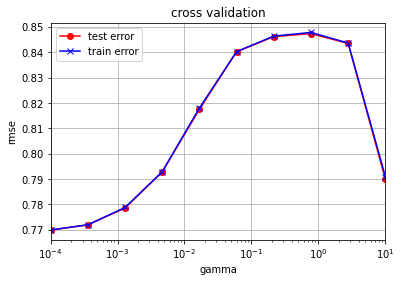

In [51]:
initial_w = np.zeros(datcc0.shape[1])


seed = 907
k_fold = 4
gammas = np.logspace(-4,1, 10)
# split data in k fold
k_indices = build_k_indices(y0, k_fold, seed)
# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []
# ***************************************************
for gamma in gammas:
    rmtr = np.zeros(k_fold)
    rmte = np.zeros(k_fold)
    for i in range(0,k_fold):
        loss_tr, loss_te, score_train, score_test = cross_validation(y0, datcc0, k_indices, i, gamma)

        rmtr[i] = score_train
        rmte[i] = score_test


    rmse_tr.append(rmtr.mean())
    rmse_te.append(rmte.mean())
    # ridge regression with a given lambda
    # ***************************************************
    # ***************************************************
print('rmse_tr',rmse_tr)
print('rmse_te',rmse_te)
i = "1"
cross_validation_visualization(gammas, rmse_tr, rmse_te)

In [50]:
np.logspace(-4,1, 10)

array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01])

In [47]:
initial_w = np.zeros(datcc1.shape[1])


seed = 907
k_fold = 4
gammas = np.linspace(0.001,10, 10)
# split data in k fold
k_indices = build_k_indices(y1, k_fold, seed)
# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []
# ***************************************************
for gamma in gammas:
    rmtr = np.zeros(k_fold)
    rmte = np.zeros(k_fold)
    for i in range(0,k_fold):
        loss_tr, loss_te, score_train, score_test= cross_validation(y1, datcc1, k_indices, i, gamma)
        rmtr[i] = score_train
        rmte[i] = score_test


    rmse_tr.append(rmtr.mean())
    rmse_te.append(rmte.mean())
    # ridge regression with a given lambda
    # ***************************************************
    # ***************************************************

i = "2"
cross_validation_visualization(gammas, rmse_tr, rmse_te)

initial_w = np.zeros(datcc2.shape[1])


seed = 907
k_fold = 4
gammas = np.linspace(0.001,10, 10)
# split data in k fold
k_indices = build_k_indices(y2, k_fold, seed)
# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []
# ***************************************************
for gamma in gammas:
    rmtr = np.zeros(k_fold)
    rmte = np.zeros(k_fold)
    for i in range(0,k_fold):
        loss_tr, loss_te, score_train, score_test= cross_validation(y2, datcc2, k_indices, i, gamma)
        rmtr[i] = score_train
        rmte[i] = score_test


    rmse_tr.append(rmtr.mean())
    rmse_te.append(rmte.mean())
    # ridge regression with a given lambda
    # ***************************************************
    # ***************************************************

i = "3"

cross_validation_visualization(gammas, rmse_tr, rmse_te)

initial_w = np.zeros(datcc3.shape[1])


seed = 907
k_fold = 4
gammas = np.logspace(0.001,10, 10)
# split data in k fold
k_indices = build_k_indices(y3, k_fold, seed)
# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []
# ***************************************************
for gamma in gammas:
    rmtr = np.zeros(k_fold)
    rmte = np.zeros(k_fold)
    for i in range(0,k_fold):
        loss_tr, loss_te, score_train, score_test= cross_validation(y3, datcc3, k_indices, i, gamma)
        rmtr[i] = score_train
        rmte[i] = score_test


    rmse_tr.append(rmtr.mean())
    rmse_te.append(rmte.mean())
    # ridge regression with a given lambda
    # ***************************************************
    # ***************************************************

i = "4"

cross_validation_visualization(gammas, rmse_tr, rmse_te)

(58158, 279)


KeyboardInterrupt: 